# MERCEDES BENZ GREENER MANUFACTURERING 
## Udacity MLND Capstone Project

### Definition
#### Project Overview
In this project we will explore a competition presented by Daimler Mercedes Benz on Kaggle.com. 

The link to the competition is here : https://www.kaggle.com/c/mercedes-benz-greener-manufacturing

The competition is hosted by Daimler Mercedes Benz they are an automotive company. As their cars have a huge variety in models and specification it takes different times to test all the features and options. In this challenge they would like Kagglers to predict the time it would take on the test bench for given features and options. This will "contribute to speedier testing, resulting in lower carbon dioxide emissions without reducing Daimler’s standards."

#### Problem Statement
The problem presented as mentioned earlier is to reduce the time cars spend on the test bench therefore resulting in faster testing and lower carbon dioxide emissions. There are many different features presented each affecting the time on the test bench, this is due the the many selections of options available for each car presented.

The main thing here is the prediction of time on the test bench given the features selected by the customers. Given this problem we would use regression techniques for this problem as the prediction 'y' is time values which is continuous data.

#### Metrics
The metrics used to evaluate the problem is the R Squared value, this is due to the restriction to testing the model through kaggle and their metric uses R Squared. But also since this is a regression problem in essence the use of R Squared is suitable for the testing. 


### Analysis
#### Data Exploration

In [1]:
#Import both train and test csvs as panda dataframes 
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv', sep =',')
test = pd.read_csv('test.csv', sep=',')

#Describes both CSV's dimensions
print train.shape
print test.shape
print train.head()

(4209, 378)
(4209, 377)
   ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...   X375  X376  X377  X378  X379  \
0   0  130.81   k  v  at  a  d  u  j  o  ...      0     0     1     0     0   
1   6   88.53   k  t  av  e  d  y  l  o  ...      1     0     0     0     0   
2   7   76.26  az  w   n  c  d  x  j  x  ...      0     0     0     0     0   
3   9   80.62  az  t   n  f  d  x  l  e  ...      0     0     0     0     0   
4  13   78.02  az  v   n  f  d  h  d  n  ...      0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 378 columns]


In [2]:
dtype = train.dtypes.reset_index()
dtype.columns = ["Count", "Column Type"]
dtype.groupby("Column Type").aggregate('count').reset_index()

Column Type  Count
0       int64    369
1     float64      1
2      object      8

1. Train data set has 4209 rows and 378 columns.

2. Test data set has 4209 rows and 377 columns, one columns less due to the missing 'y' column which we are trying to predict

We can see that majority of the columns are integers and there are 8 columns with objects, those are X0,X1,X2,X3,X4,X5,X6,X8.



In [3]:
print (train['y'].describe())

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64


We take a look deper into the train dataset as we will be using it to train our algorithms. First we explore the 'y' value or the time value we would try to predict. There are 4209 rows as mentioned and the mean is 100.669318 as mentioned before in the proposal, this would be one of the benchmarks we use. 

We can see the standard deviation is not a massively large number and we see the lower 25 percentile and upper 75 percentile is 90.82 and 109.01. Meaning that predictions will stay relatively close to the mean and therefore I think would be a good benchmark to use. 

#### Exploratory Visualization

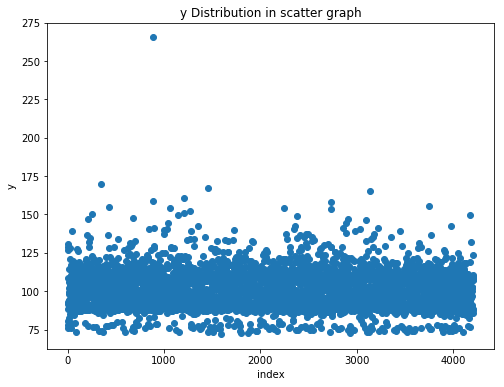

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]),train['y'])
plt.ylabel('y')
plt.xlabel('index')
plt.title('y Distribution in scatter graph')

plt.show()

We can see the above diagram shows the distribution of the 'y' values in the training data. As we can see that the previous observation of majority of values staying between ~90 to ~110 is fairly accurate. There seems to be one outlier here in terms of 'y' value and that would be the max value. The representation seems a little vague and does not provide a clear indication of values.

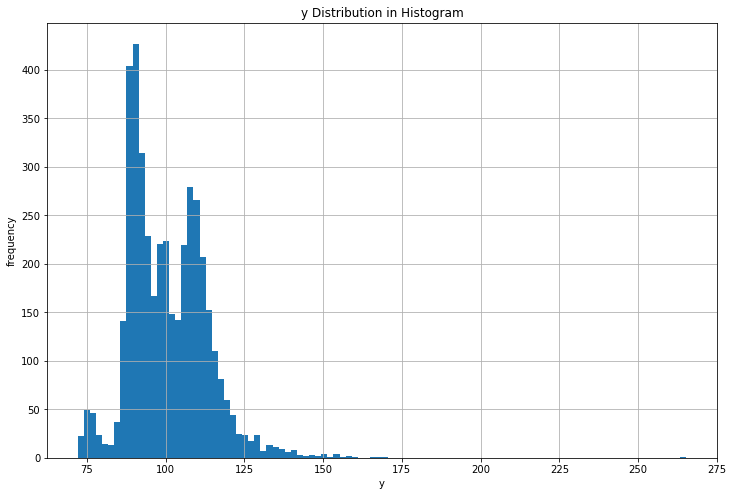

In [5]:
plt.figure(figsize=(12,8))
train['y'].hist(bins=100)
plt.title('y Distribution in Histogram')
plt.ylabel('frequency')
plt.xlabel('y')
plt.show()

Here using a histogram to display frequency is a lot clearer, we see that our previous observation was correct and also it gives a better understanding of the distribution of y values. 

#### Algorithms and Techniques

I am going to use neural networks in this project in order to attempt and achieve a best possible R Squared score. For neural networks I will be using Keras and Tensorflow as backend and be using MLP as my architecture. RNN, CNNs does not seem appropriate for this example here. I will use a MLP since they are full connected layers and each feature avaliable to use should contribute on some level to the prediction of 'y' values. This is because each feature here represents an option available on the car and therefore each of these options on the car should affect the 'y' time on the testing bench on some level.

Since MLPs only take numerical data I will have to OneHotEncode the categorical or object columns. 

#### Benchmark 
For benchmark we will use the private leaderboard score on Kaggle to designate the final value. The private leaderboard score calculates 81% of the test data and therefore should give us a good idea of how well the model behaves. 

As mentioned I took the mean of the 'y' value in the train dataset and used it to submit on Kaggle, the rationale here is that the deviation from the mean is not dramatic and therefore could give us a fairly good indicator of a score to beat. 

After submission the private leaderboard score is **-0.00169** this score is clearly absolutely terrible. Although our rationale is valid we can see that our data still has enough variation where using the mean completely fails for the test data. 

### Methodology
#### Data Preprocessing

For data preprocessing I will have to One Hot Encode the categorical columns as I have mentioned previously. I will use sklearn's preprocessing module to do this. Also I will prepare the data for model training by removing the 'ID' column and also 'y'. I decided to remove 'ID' as it is just another index. 

In [6]:
# import LabelEncoder from sklearn to do one hot encoding for us
from sklearn.preprocessing import LabelEncoder

def encode_columns(x):
    train[x] = LabelEncoder().fit_transform(train[x])

#columns that need to be encoded
hot_columns = ['X0','X1','X2','X3','X4','X5','X6','X8']

for x in hot_columns:
    encode_columns(x)

print train.head()

# Dropping ID so it does not skew our data later on in model training
X_pre = train.drop('ID',1)

#We drop y as it is the thing we are trying to predict
y = train['y']
X = X_pre.drop('y',1)



   ID       y  X0  X1  X2  X3  X4  X5  X6  X8  ...   X375  X376  X377  X378  \
0   0  130.81  32  23  17   0   3  24   9  14  ...      0     0     1     0   
1   6   88.53  32  21  19   4   3  28  11  14  ...      1     0     0     0   
2   7   76.26  20  24  34   2   3  27   9  23  ...      0     0     0     0   
3   9   80.62  20  21  34   5   3  27  11   4  ...      0     0     0     0   
4  13   78.02  20  23  34   5   3  12   3  13  ...      0     0     0     0   

   X379  X380  X382  X383  X384  X385  
0     0     0     0     0     0     0  
1     0     0     0     0     0     0  
2     0     0     1     0     0     0  
3     0     0     0     0     0     0  
4     0     0     0     0     0     0  

[5 rows x 378 columns]


Below I split the train dataset into training and testing sets, this is for testing internally as the Kaggle competition does not provide the test dataset 'y' values. It is a good idea to test internally to get a benchmark of how well the model does. I decided to use a 81:19 split as this is the split they used for public and private leaderboards. Also It is because there are only ~4200 rows which is not a lot of data considering I will be using a MLP neural network

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.19, random_state=42)



In [8]:
#import all modules required to create Kera's Neural Network Architecture
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dropout, Flatten, Dense

def base_model():
    model = Sequential()
    model.add(Dense(376,input_shape=(376,),activation='relu'))
    model.add(Dense(258,input_shape=(376,),activation='relu'))
    model.add(Dense(128, input_shape = (258,),activation='relu'))
    model.add(Dense(64, input_shape = (128,),activation='relu'))
    model.add(Dense(32, input_shape = (64,),activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer ='adam')
    return model


def simple_model():
    model = Sequential()
    model.add(Dense(376,input_shape=(376,),activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer ='adam')
    return model


def wide_model():
    model = Sequential()
    model.add(Dense(752,input_shape=(376,),activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer ='adam')
    return model

def narrow_model():
    model = Sequential()
    model.add(Dense(188,input_shape=(376,),activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer ='adam')
    return model

clf = KerasRegressor(build_fn=wide_model, nb_epoch=100, batch_size=25,verbose=0)
clf.fit(X_train,y_train)

#import the R2_score metric which is the same used by kaggle as well
#this allows internal testing before submission
from sklearn.metrics import r2_score
score = r2_score(y_test, clf.predict(X_test))
print score




Using TensorFlow backend.


0.563775899149


As you can see above I have actually created multiple models here and decided to use the wide_model variation as it gave me the best score out of all of them. It returned a score of 0.5753 , it is important to note this is only the internal score conducted on the split. I will be comparing all the results later on to give a better idea of the improvements and so on. Obviously our final testing will be based on the kaggle scores, I think here it is important to note that even for the final submission I will still split the datasets into testing and and training based on original data. If I were to use all the data from the training csv and applied to testing csv it could lead to overfitting and also this allows me to internally score before i submit. Kaggle only allows 5 submission every 24 hours which means that it is difficult to test the true capability but this allows us to get a general idea. 

The score of 0.5753 is actually very good in comparison to the kaggle competitions scores on the private leaderboard. The top score achieved was 0.55551, obviously this is only internal scoring but it is good to see that our trained MLP is performing well with internal testing already. 

Next I will be attempting to use f_regression to select features and narrow down the amount of total inputs, I believe this will improve the score as there may be noise in the data and irrelevant data. Using f_regression I hope to find all the variables that matter most to the prediction methodology. I have selected f_regression as it is test of significance in a regression analysis, we are attempting to eliminate noise and also we are doing a regression analysis which i thought would be suitable for our use.

In [9]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

f_reg = SelectKBest(f_regression, k=64)
analysis_f = f_reg.fit(X,y)

X_new = f_reg.fit_transform(X, y)

#Load the analysis into a variable so we can use it later to apply on our final testing set
analysis=  analysis_f.get_support()
analysis.shape

#split the data as usual for training and internal testing
X_new_train, X_new_test, y_train, y_test = train_test_split(X_new, y.as_matrix(), test_size=0.19, random_state=42)


/Users/Ryan/anaconda/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in divide
  corr /= row_norms(X.T)
/Users/Ryan/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/Ryan/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/Ryan/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [10]:
def simple_model_new():
    model = Sequential()
    model.add(Dense(32,input_shape=(64,),activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer ='adam')
    return model


def base_model_new():
    model = Sequential()
    model.add(Dense(128,input_shape=(64,),activation='relu'))
    model.add(Dense(258,input_shape=(128,),activation='relu'))
    model.add(Dense(128, input_shape = (258,),activation='relu'))
    model.add(Dense(64, input_shape = (128,),activation='relu'))
    model.add(Dense(32, input_shape = (64,),activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer ='adam')
    return model

def multi_connected_new():
    model = Sequential()
    model.add(Dense(128,input_shape=(64,),activation='relu'))
    model.add(Dense(64,input_shape=(128,),activation='relu'))
    model.add(Dense(16,input_shape=(64,),activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer ='adam')
    return model

clf2 = KerasRegressor(build_fn=multi_connected_new, nb_epoch=1000, batch_size=5,verbose=0)
clf2.fit(X_new_train,y_train)
score = r2_score(y_test, clf2.predict(X_new_test))
print score


0.581713838673


Above we see the implementation of our f_regression, I have selected 64 features to select. Given that we have 376 features I believe this reduction will remove a lot of noise. I have attempted to use more and less features but 64 seems to be a sweet spot to increase our model's accuracy. 

As for the implementation of MLP and prediciton we use a different model, i attempted to use the same model but it did not optimize for a higher score. Now we are able to reach a score of 0.58669 which is quite a bit higher than our standard model. We use a 3 layer model here in comparison to the one layer model previously, this is because with the reduction of features there is probably more information we are able to retrieve using more layers, and also with 300+ features if we used many layered model the computational time will be much higher but with lower number of features we can reduce our computational time. I tried to keep the layers low as well to reduce overfitting on some level. 

In [11]:
#One hot encode the test csv
def encode_columns_final(x):
    test[x] = LabelEncoder().fit_transform(test[x])
for x in hot_columns:
    encode_columns_final(x)


dtest = test.drop('ID',1)

#Drop features using our f_regression analysis
dtest_new = dtest.loc[:, analysis]


print dtest_new.shape

type(dtest_new)


(4209, 64)


pandas.core.frame.DataFrame

In [12]:
#Predict using both our models 
pred = clf.predict(dtest.as_matrix())
pred2 = clf2.predict(dtest_new.as_matrix())

In [13]:
# Output of the submission for kaggle 

submission = pd.DataFrame()
submission2 = pd.DataFrame()
s = pd.Series(pred)
s2 = pd.Series(pred2)
idt = pd.Series(test['ID'])


submission['ID'] = idt
submission['y'] = s

submission2['ID'] = idt
submission2['y'] = s2

submission.to_csv('submission.csv',index=False)
submission2.to_csv('submission2.csv',index=False)

### Results

|Model|Internal Test|Public Leaderboard|Private Leaderboard|
|:----|------------:|-----------------:|------------------:|
|dummy| N/A         | -0.00039         | -0.00169          |
|base |0.575390     |0.51064           |0.51341            |
|reduced |0.586690    |0.52723          |0.52027           |

We can see that above results, clearly our final reduced model scored the highest overall in all test, whilst base model performed 2nd and the dummy test performed last. 

This is a result that I believe proved our model was succesful in the first place and also the f_regression we did improved our final score and it was not just due to overfitting. Although we see that our internal testing scored much higher than both public and private leaderboard scores, this could mean that we are still overfitting on some level. The different in internal test and the leaderboard scores could also be attributed to the lack of internal testing data we had. In the end we only had a very minimal amount of data to test on, we could not have more internal testing as this would leave very little training data for our model. 

I believe our model was succesful in comparison to the top score on kaggle which is 0.55551 for the private leaderboard we are still quite a ways away from the perfect solution. I have used private leaderboard for the comparison as a lot of public leaderboard top scorers fell a lot in ranking due to them overfitting to public leaderboard's data. I believe our model is still valid as we came relatively close to what people achieved, others used different Machine Learning techniques such as XGboost and boosted trees to achieve their score but it is good to see that with MLPs we are able to reach similar levels of accuracy in prediction. 

Note: Scores vary a little each time it is run

### Conclusion

In this project clearly there was many ways of improvements even using the method I have chosen. The architecture of the Neural Networks was probably one of the most difficult things to construct, there is no any guidelines of how neural networks should be constructed with the data although and it is more of a guessing game of how the architectures to look like, there are too many variables here in order to get the best possible score. I believe with enough testing and trial and error you could achieve a much greater score using MLP but there are essentially infinite varaiations of layers to consider which is one of the biggest issue with using MLPs on such projects or essentially any Neural Networks. There is no clear understanding of how to efficently architect the best neural network for a problem, which would be another interesting area to explore. 

Another issue is feature selection, there is no clear idea of what each of these features represent they are just data in the end and no additional information is given. This clearly is an issue in the end, if there is some sort of understanding what each feature is it is possible to pick the best possible features without using f_regression. Alot of these things may be more intuitive to pick in the end to achieve the best possible results. 

In the end I believe the biggest improvement that can be introduced would be more time, the variations of feature selection and model architect is essentialy infinite. With enough time you could construct a perfect model to capture everything perfectly. As mentioned earlier the biggest improvement would probably come as the better understanding of the features as this would give some logical reasoning and understanding of the underlying problem. 